Online news poplarity is a dataset from UCI Machine Learning Repository. 

The dataset contains 61 attributes and 39644 instances. The goal is to predict the number of shares of an article on social media.

 This is a reasonable assumption as the no.of shares is a direct measure of the number of people who have read the article and found it interesting enough to share it.

Importing the necessary libraries and the dataset:

```python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
# uploading dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = df.columns.str.replace(' ', '')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Clean the data

In [3]:
# check for any articles with 0 words in them
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [4]:
# remove the articles with 0 words
df = df[df['n_tokens_content']!=0]


In [5]:
# check for any articles with 0 words in title
num_of_nowords=df[df['n_tokens_title']==0].index
print('number of news items with no title',num_of_nowords.size)

number of news items with no title 0


In [6]:
# drop the non predictive features
df.drop(labels=['url', 'timedelta'], axis=1, inplace=True)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,10.382419,563.295375,0.565049,1.027065,0.710336,11.217872,3.394769,4.563061,1.263786,4.687892,...,0.098376,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930,3355.360398
std,2.113800,468.299538,3.573022,5.307978,3.312293,11.340580,3.869773,8.295365,4.164896,0.283231,...,0.070382,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636,11585.968776
min,2.000000,18.000000,0.114964,1.000000,0.119134,0.000000,0.000000,0.000000,0.000000,3.600000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,1.000000,0.632588,5.000000,1.000000,1.000000,0.000000,4.496250,...,0.050000,0.600000,-0.331532,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542986,1.000000,0.693727,8.000000,3.000000,1.000000,0.000000,4.674121,...,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,1.000000,0.756944,14.000000,4.000000,4.000000,1.000000,4.861901,...,0.100000,1.000000,-0.193415,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
#drop any duplicate rows
df.drop_duplicates(inplace=True)

There are no duplicates and no missing values in the dataset.

Exploratory data analysis 

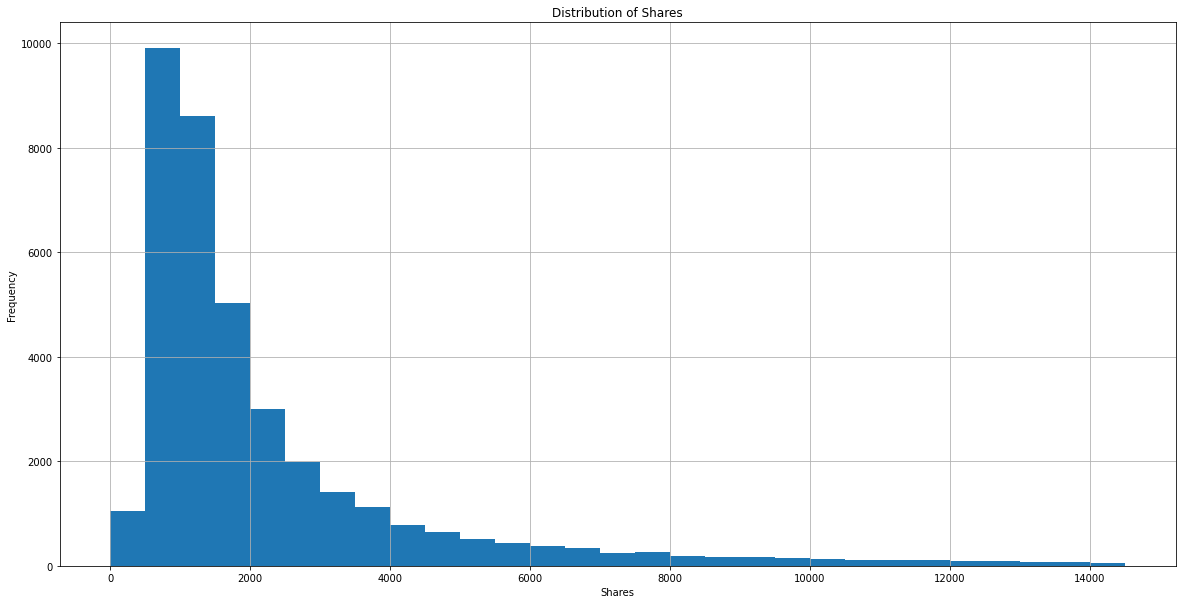

The median number of shares is 1400.0
The mean number of shares is 3355.3603983048642


In [8]:
n_shares = np.arange(0, 15000, 500)

df['shares'].hist(bins = n_shares, figsize = (20, 10))
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

print('The median number of shares is', df['shares'].median())
print('The mean number of shares is', df['shares'].mean())

Most of the articles are shared less than 2000 times. The distribution of the number of shares is skewed to the right. The median is 1400 shares, while the mean is 3395 shares. The maximum number of shares is 843300 shares.

In [9]:
# for column in df.columns:
#     if column != 'shares':
#         plt.figure(figsize=(15,7.5))
        
#         plt.scatter(df[str(column)], shares, alpha=0.4)
#         plt.xlabel(column)
#         plt.ylabel('shares')
#         plt.show()

<AxesSubplot:>

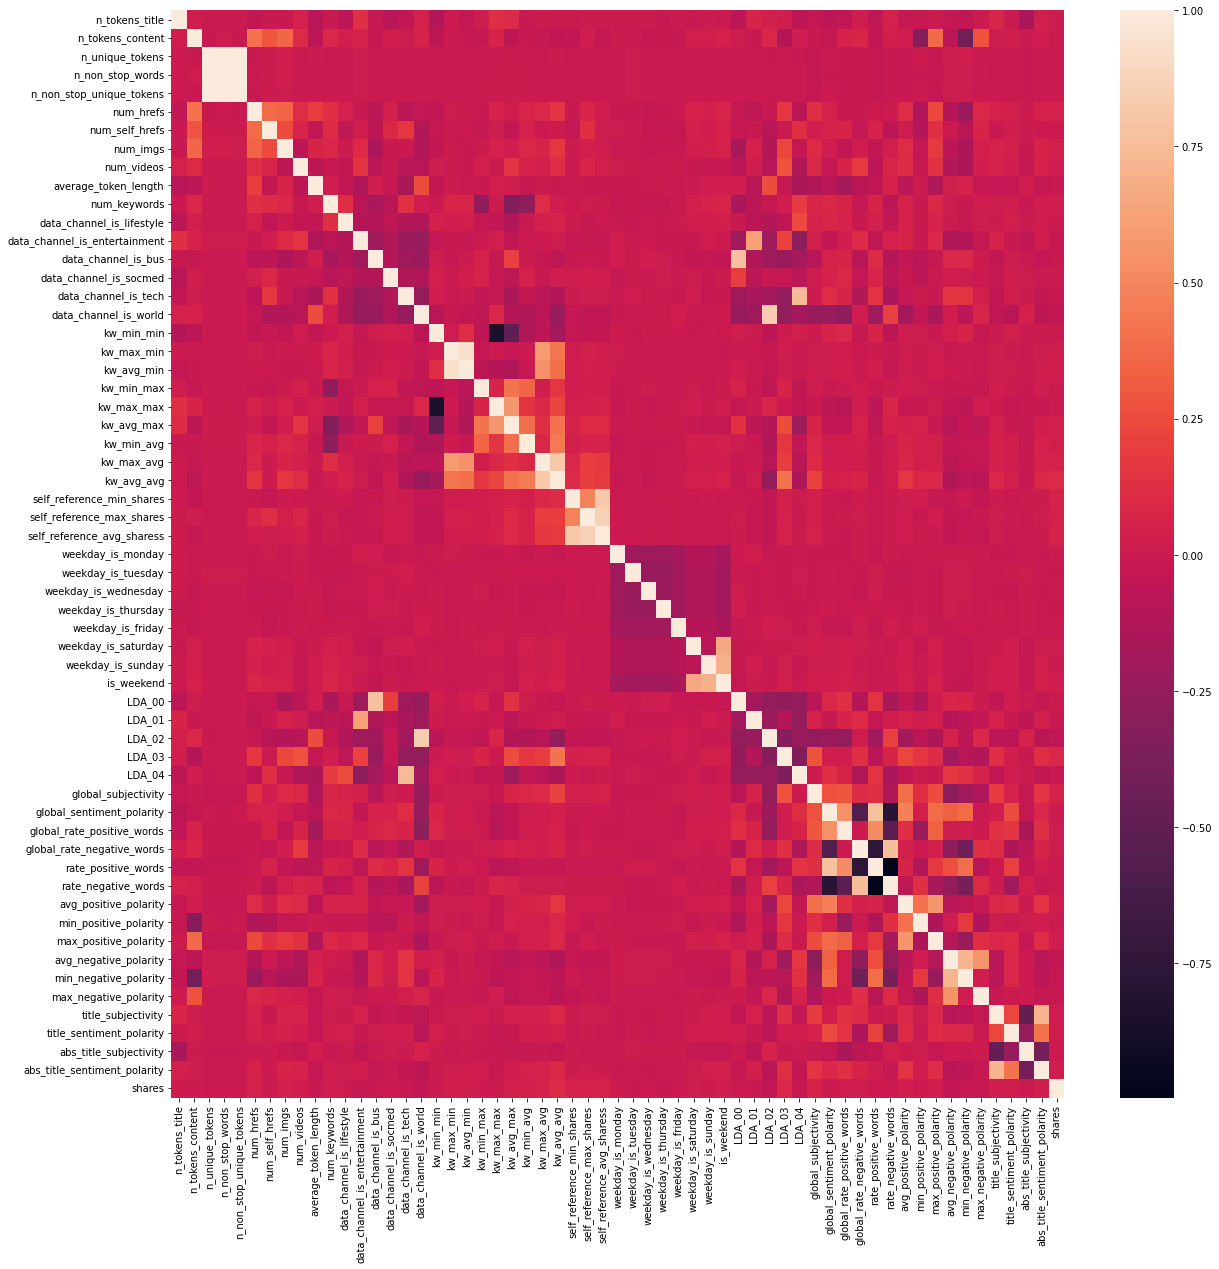

In [10]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr()) 

Let's first see what is the average shares for each weekday.

weekday_is_monday


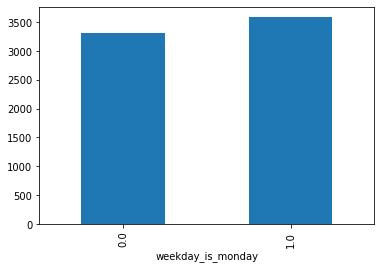

weekday_is_tuesday


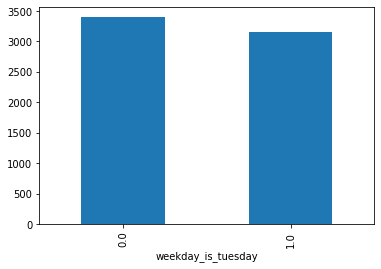

weekday_is_wednesday


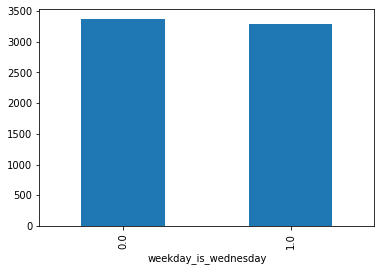

weekday_is_thursday


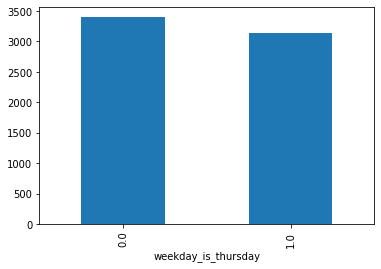

weekday_is_friday


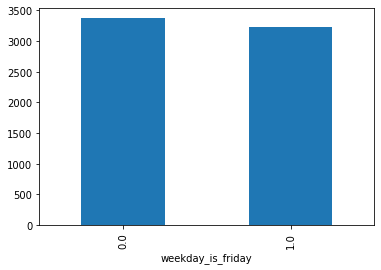

weekday_is_saturday


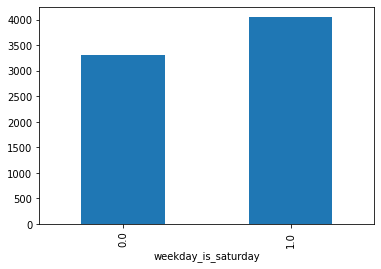

weekday_is_sunday


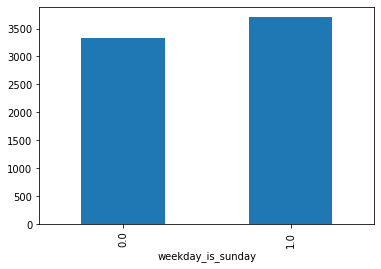

In [11]:
# for each weekday, the number of articles published and the average number of shares

for i in range(29,36):
    print(df.columns[i])
    (df.groupby(df.columns[i])['shares'].mean()).plot(kind='bar')
    plt.show()   
#they don't seem to have a strong correlation barring saturday



<AxesSubplot:xlabel='is_weekend'>

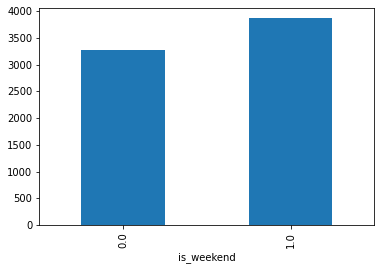

In [12]:
#lets check if there is any correlation with is_weekend and shares

df.groupby('is_weekend')['shares'].mean().plot(kind='bar')
#weekend the shares are a bit more

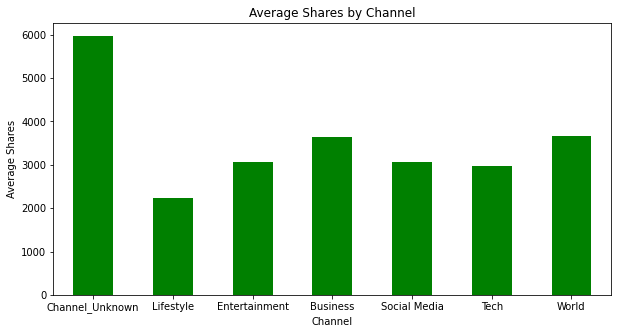

In [13]:
#checking by data channel
data_channels = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

shares_by_channel = df.groupby(data_channels)['shares'].mean()
channels_names = ['Channel_Unknown','Lifestyle','Entertainment','Business','Social Media','Tech','World']

shares_by_channel.plot(kind='bar',figsize=(10,5),title='Average Shares by Channel',color='green')
plt.xticks(np.arange(7),channels_names,rotation=0)
plt.xlabel('Channel')
plt.ylabel('Average Shares')
plt.title('Average Shares by Channel')
plt.show()









As we can see Business an Tech are the most popular topics. The least popular topics are Lifestyle and Entertainment.

In [14]:
feature_data = df.drop( 'shares',axis=1)
target_data = df['shares']




<AxesSubplot:title={'center':'Correalation with response variable'}>

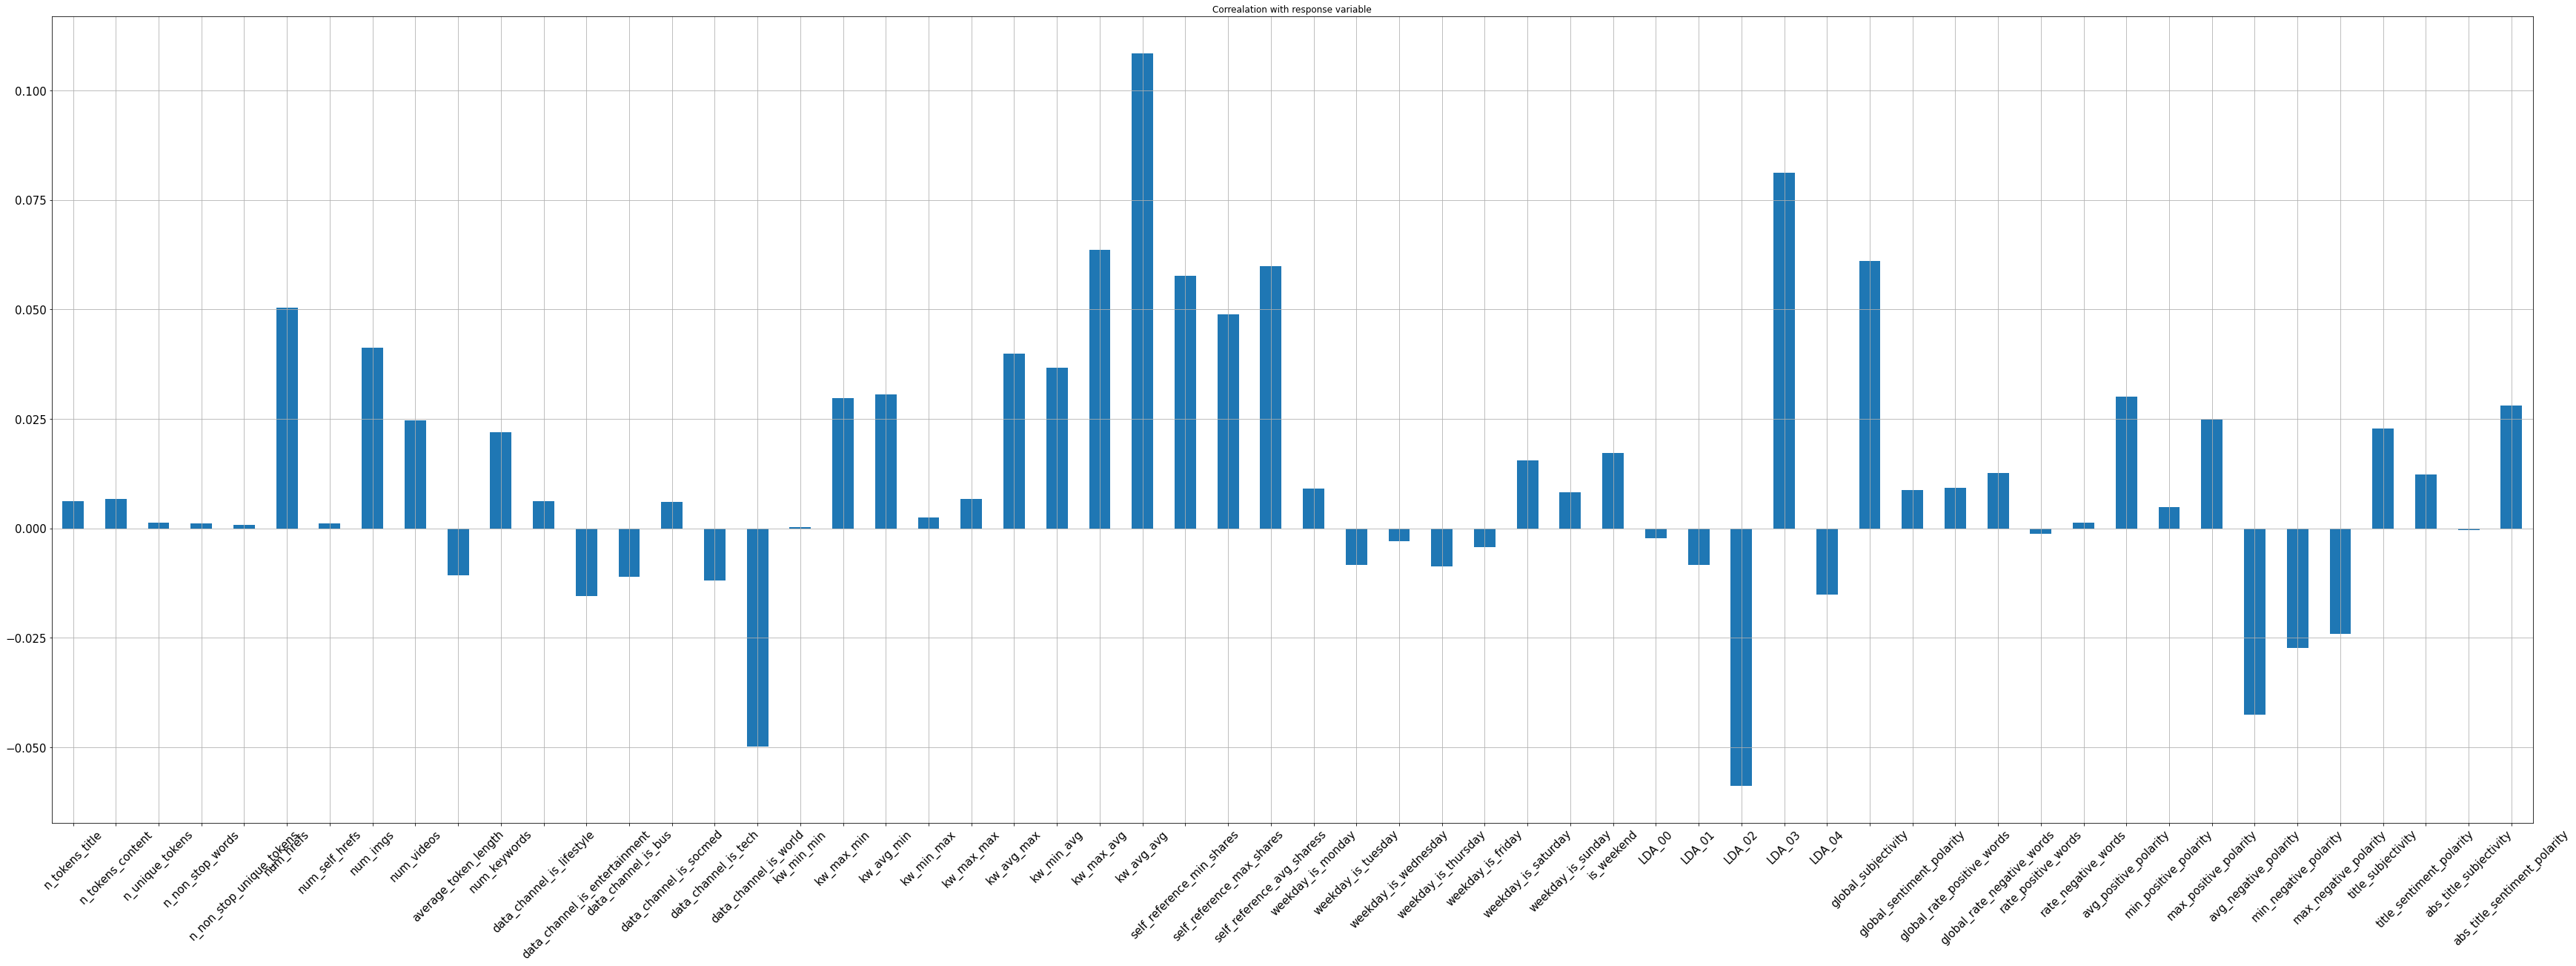

In [15]:
feature_data.corrwith(target_data).plot.bar(figsize=(60,20),title="Correalation with response variable",fontsize=15,rot=45,grid=True)

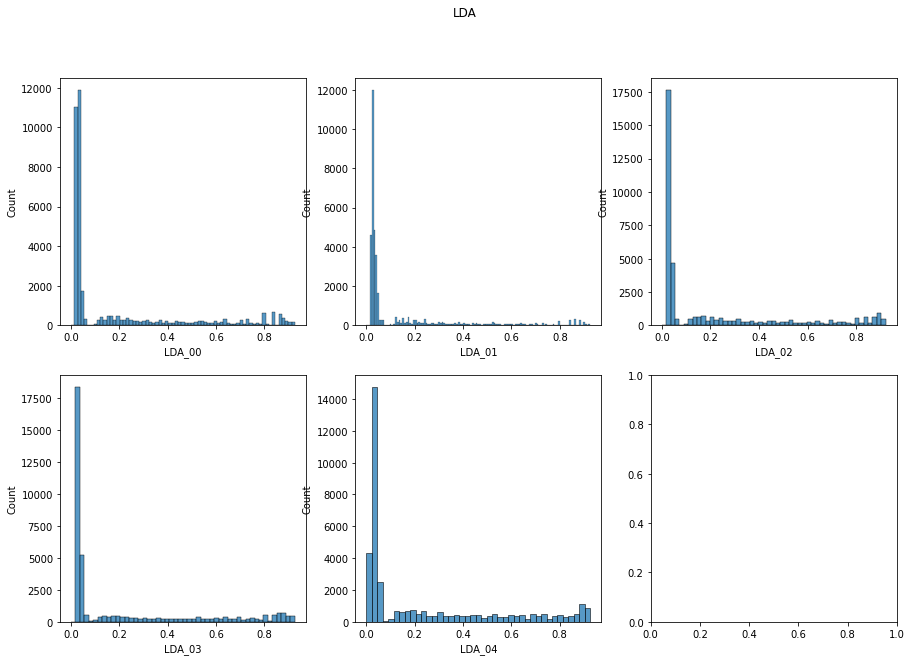

In [16]:
fig, axs = plt.subplots(2, 3)
fig.suptitle('LDA')
fig.set_figheight(10)
fig.set_figwidth(15)
sns.histplot(data=df, x="LDA_00", kde=False,ax=axs[0, 0])
sns.histplot(data=df, x="LDA_01", kde=False,ax=axs[0, 1])
sns.histplot(data=df, x="LDA_02", kde=False,ax=axs[0, 2])
sns.histplot(data=df, x="LDA_03", kde=False,ax=axs[1, 0])
sns.histplot(data=df, x="LDA_04", kde=False,ax=axs[1, 1])
plt.show()

Model building

In [18]:
# divide the data into test and train

from sklearn.model_selection import train_test_split

# split the data into train and test with only LDA features
X, y = feature_data,target_data



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)



Ridge and lasso regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
clf = Ridge(alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Mean absolute error: %.2f' % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean absolute error: 527646667.90
R2 score: -3.14


C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.46834e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Decision Tree regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [ ]:
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(X_train, Y_train)
y_pred = DTR.predict(X_test)
print("Decision Tree Regressor")
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
print("R2 score: %.2f" % r2_score(Y_test, y_pred))
print("Explained variance score: %.2f" % explained_variance_score(Y_test, y_pred))


Decision Tree Regressor
Mean squared error: 233235394.24
R2 score: -2.06
Explained variance score: -2.06


In [ ]:
RFR = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, verbose=1)
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
print('RFR score: ', RFR.score(X_test, y_test))
print('RFR MSE: ', mean_squared_error(y_test, y_pred))
print('RFR R2: ', r2_score(y_test, y_pred))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s


RFR score:  -0.10592549601288637
RFR MSE:  133454058.48208462
RFR R2:  -0.10592549601288637


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
